<a href="https://colab.research.google.com/github/joaosocorro/CAP-TULO-16-Aprendizagem-por-Refor-o/blob/main/CAP%C3%8DTULO_16_Aprendizagem_por_Refor%C3%A7o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')


In [7]:
import pandas as pd
import numpy as np

In [8]:
import tensorflow as tf
print(tf.__version__)


Mounted at /content/drive


In [9]:
!pip install matplotlib-venn

In [10]:
!pip install tf_slim
import tf_slim as slim

In [11]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [12]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [13]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


ModuleNotFoundError: No module named 'libarchive'

In [14]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.8 MB/s eta 0:00:00


In [15]:

#dados em CSV

dados=pd.read_csv('/content/drive/MyDrive/X.csv',sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/X.csv'

In [16]:

#Dados em xlsx




data = pd.read_excel('/content/drive/MyDrive/nome_do_seu_arquivo.xlsx')



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/nome_do_seu_arquivo.xlsx'


### **CAPÍTULO 16 Aprendizagem por Reforço**



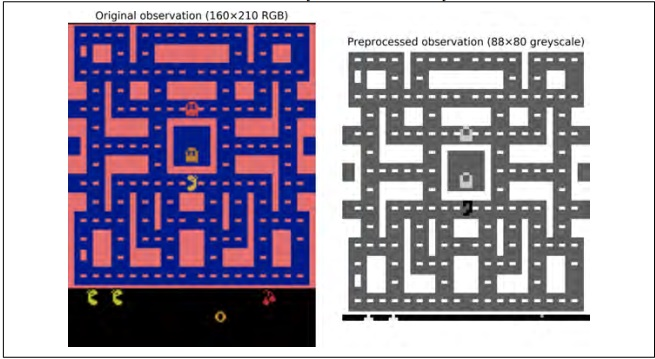**Aprendendo a otimizar recompensas**

**Pesquisa de políticas**

**Introdução ao OpenAI Gym**

In [17]:
 !pip3 install --upgrade gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827618 sha256=ac468e3600a8088986091d71d0955ead43d1b281b8b1dc73691f6ac8cb562547
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [18]:
import gym

Em seguida, abra um shell Python ou um notebook Jupyter e crie seu primeiro ambiente:

In [19]:
env = gym.make("CartPole-v0")

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [20]:
obs = env.reset()
obs

(array([-0.0119397 , -0.02872992,  0.03810852,  0.0031923 ], dtype=float32),
 {})

In [21]:
env.render()

/usr/local/lib/python3.10/dist-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v0", render_mode="rgb_array")
  gym.logger.warn(


In [22]:
img = env.render(mode="rgb_array")
img.shape # height, width, channels (3=RGB)

TypeError: CartPoleEnv.render() got an unexpected keyword argument 'mode'

Vamos perguntar ao meio ambiente quais ações são possíveis:

In [ ]:
nv.action_space

In [ ]:
action = 1 # accelerate right
obs, reward, done, info = env.step(action)
obs

reward
1.0
done

info
{}

In [ ]:
obs

Esta é a nova observação. O carrinho agora está se movendo para a direita (obs[1]>0). O poste ainda está inclinado para a direita (obs[2]>0), mas sua velocidade angular agora é negativa (obs[3]<0), então provavelmente será inclinado para a esquerda após a próxima etapa.

In [ ]:
reward

In [ ]:
done

In [ ]:
info

In [ ]:
def basic_policy(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

In [ ]:
totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(1000):
      # 1000 steps max, we don't want to run forever
      action = basic_policy(obs)
      obs, reward, done, info = env.step(action)
      episode_rewards += reward
      if done:
        break
  totals.append(episode_rewards)

Esperamos que este código seja autoexplicativo. Vejamos o resultado:

In [ ]:
import numpy as np

In [ ]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Aqui está o código para construir esta política de rede neural usando TensorFlow:

In [ ]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [ ]:
# 1. Specify the neural network architecture
n_inputs = 4 # == env.observation_space.shape[0]
n_hidden = 4 # it's a simple task, we don't need more hidden neurons
n_outputs = 1 # only outputs the probability of accelerating left
initializer = tf.contrib.layers.variance_scaling_initializer()

In [ ]:
# 2. Build the neural network
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = fully_connected(X, n_hidden, activation_fn=tf.nn.elu,
                         weights_initializer=initializer)
logits = fully_connected(hidden, n_outputs, activation_fn=None,
                         weights_initializer=initializer)
outputs = tf.nn.sigmoid(logits)

In [ ]:
# 3. Select a random action based on the estimated probabilities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

In [ ]:
init = tf.global_variables_initializer()

**Avaliando Ações: O Problema da Atribuição de Crédito**

**Gradientes de política**

Vamos implementar este algoritmo usando TensorFlow. Treinaremos a política de rede neural que construímos anteriormente para que ela aprenda a equilibrar o poste no carrinho. Vamos começar concluindo a fase de construção que codificamos anteriormente para adicionar a probabilidade alvo, a função de custo e a operação de treinamento. Como estamos agindo como se a ação escolhida fosse a melhor ação possível, a probabilidade alvo deve ser 1,0 se a ação escolhida for a ação 0 (esquerda) e 0,0 se for a ação 1 (direita):

In [ ]:
y = 1. - tf.to_float(action)

Agora que temos uma probabilidade alvo, podemos definir a função de custo (entropia cruzada) e calcular os gradientes:

In [ ]:
learning_rate = 0.01

In [ ]:
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
    labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)

In [ ]:
gradients = [grad for grad, variable in grads_and_vars]

In [ ]:
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
  gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
  gradient_placeholders.append(gradient_placeholder)
  grads_and_vars_feed.append((gradient_placeholder, variable))

In [ ]:
training_op = optimizer.apply_gradients(grads_and_vars_feed)

Vamos dar um passo atrás e dar uma olhada na fase completa de construção:

In [ ]:
n_inputs = 4
n_hidden = 4
n_outputs = 1
initializer = tf.contrib.layers.variance_scaling_initializer()

In [ ]:
learning_rate = 0.01

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = fully_connected(X, n_hidden, activation_fn=tf.nn.elu,
                         weights_initializer=initializer)
logits = fully_connected(hidden, n_outputs, activation_fn=None,
                         weights_initializer=initializer)
outputs = tf.nn.sigmoid(logits)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

In [ ]:
y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
    labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
  gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
  gradient_placeholders.append(gradient_placeholder)
  grads_and_vars_feed.append((gradient_placeholder, variable))
  training_op = optimizer.apply_gradients(grads_and_vars_feed)


In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Vamos para a fase de execução! Precisaremos de algumas funções para calcular o total de recompensas com desconto, dadas as recompensas brutas, e para normalizar os resultados em vários episódios:

In [ ]:
def discount_rewards(rewards, discount_rate):
  discounted_rewards = np.empty(len(rewards))
  cumulative_rewards = 0
  for step in reversed(range(len(rewards))):
    cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
    discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

In [ ]:
def discount_and_normalize_rewards(all_rewards, discount_rate):
  all_discounted_rewards = [discount_rewards(rewards)
  for rewards in all_rewards]
  flat_rewards = np.concatenate(all_discounted_rewards)
  reward_mean = flat_rewards.mean()
  reward_std = flat_rewards.std()
  return [(discounted_rewards - reward_mean)/reward_std
          for discounted_rewards in all_discounted_rewards]

Vamos verificar se isso funciona:

In [ ]:
discount_rewards([10, 0, -50], discount_rate=0.8)

In [ ]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

Agora temos tudo o que precisamos para treinar a política:

In [ ]:
n_iterations = 250 # number of training iterations
n_max_steps = 1000 # max steps per episode
n_games_per_update = 10 # train the policy every 10 episodes
save_iterations = 10 # save the model every 10 training iterations
discount_rate = 0.95

In [ ]:
with tf.Session() as sess:
  init.run()
  for iteration in range(n_iterations):
    all_rewards = [] # all sequences of raw rewards for each episode
    all_gradients = [] # gradients saved at each step of each episode
    for game in range(n_games_per_update):
      current_rewards = [] # all raw rewards from the current episode
      current_gradients = [] # all gradients from the current episode
      obs = env.reset()
      for step in range(n_max_steps):
        action_val, gradients_val = sess.run(
            [action, gradients],
            feed_dict={X: obs.reshape(1, n_inputs)}) # one obs
            obs, reward, done, info = env.step(action_val[0][0])
            current_rewards.append(reward)
            current_gradients.append(gradients_val)
            if done:
              break
              all_rewards.append(current_rewards)
              all_gradients.append(current_gradients)


In [ ]:
# At this point we have run the policy for 10 episodes, and we are
# ready for a policy update using the algorithm described earlier.
all_rewards = discount_and_normalize_rewards(all_rewards)
feed_dict = {}
for var_index, grad_placeholder in enumerate(gradient_placeholders):
  # multiply the gradients by the action scores, and compute the mean
  mean_gradients = np.mean(
      [reward * all_gradients[game_index][step][var_index]
       for game_index, rewards in enumerate(all_rewards)
       for step, reward in enumerate(rewards)],
      axis=0)
  feed_dict[grad_placeholder] = mean_gradients
  sess.run(training_op, feed_dict=feed_dict)
  if iteration % save_iterations == 0:
   # saver.save(sess, "./my_policy_net_pg.ckpt")

**Processos de decisão de Markov**

Vamos aplicar este algoritmo ao MDP representado na Figura 16-8. Primeiro, precisamos definir o MDP:

In [ ]:
nan=np.nan # represents impossible actions
T = np.array([ # shape=[s, a, s']
 [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
               [[0.0, 1.0, 0.0], [nan, nan, nan], [0.0, 0.0, 1.0]],
                [[nan, nan, nan], [0.8, 0.1, 0.1], [nan, nan, nan]],
               ])
R = np.array([ # shape=[s, a, s']
 [[10., 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
  [[10., 0.0, 0.0], [nan, nan, nan], [0.0, 0.0, -50.]],
   [[nan, nan, nan], [40., 0.0, 0.0], [nan, nan, nan]],
               ])
possible_actions = [[0, 1, 2], [0, 2], [1]]

Agora vamos executar o algoritmo Q-Value Iteration:

In [ ]:
Q = np.full((3, 3), -np.inf) # -inf for impossible actions
for state, actions in enumerate(possible_actions):
  Q[state, actions] = 0.0 # Initial value = 0.0, for all possible actions

learning_rate = 0.01
discount_rate = 0.95
n_iterations = 100

In [ ]:
for iteration in range(n_iterations):
  Q_prev = Q.copy()
  for s in range(3):
    for a in possible_actions[s]:
      Q[s, a] = np.sum([
          T[s, a, sp] * (R[s, a, sp] + discount_rate * np.max(Q_prev[sp]))
          for sp in range(3)
          ])

Os valores Q resultantes são assim:

In [ ]:
Q

In [ ]:
 np.argmax(Q, axis=1) # optimal action for each state

**Aprendizagem por diferença temporal e Q-Learning**

Veja como o Q-Learning pode ser implementado:

In [ ]:
import numpy.random as rnd

In [ ]:
learning_rate0 = 0.05
learning_rate_decay = 0.1
n_iterations = 20000

In [ ]:
s = 0 # start in state 0

In [ ]:
Q = np.full((3, 3), -np.inf) # -inf for impossible actions
for state, actions in enumerate(possible_actions):
  Q[state, actions] = 0.0 # Initial value = 0.0, for all possible actions

In [ ]:
for iteration in range(n_iterations):
  a = rnd.choice(possible_actions[s]) # choose an action (randomly)
  sp = rnd.choice(range(3), p=T[s, a]) # pick next state using T[s, a]
  reward = R[s, a, sp]
  learning_rate = learning_rate0 / (1 + iteration * learning_rate_decay)
  Q[s, a] = learning_rate * Q[s, a] + (1 - learning_rate) * (
      reward + discount_rate * np.max(Q[sp])
      )
  s = sp # move to next state

**Políticas de Exploração**

**Q-Learning Aproximado**

**Aprendendo a jogar a Sra. Pac-Man usando Deep Q-Learning**

In [ ]:
 brew install cmake boost boost-python sdl2 swig wget

No Ubuntu, digite o seguinte comando (substituindo python3 por python se você estiver usando Python 2):

In [ ]:
apt-get install -y python3-numpy python3-dev cmake zlib1g-dev libjpeg-dev\
xvfb libav-tools xorg-dev python3-opengl libboost-all-dev libsdl2-dev swig

Em seguida, instale os módulos extras do Python:

In [ ]:
pip3 install --upgrade 'gym[all]'

Se tudo correr bem, você poderá criar um ambiente Ms. Pac-Man:

In [ ]:
env = gym.make("MsPacman-v0")
obs = env.reset()
obs.shape # [height, width, channels]
(210, 160, 3)
env.action_space
Discrete(9)

In [ ]:
mspacman_color = np.array([210, 164, 74]).mean()

In [ ]:
def preprocess_observation(obs):
  img = obs[1:176:2, ::2] # crop and downsize
  img = img.mean(axis=2) # to greyscale
  img[img==mspacman_color] = 0 # improve contrast
  img = (img - 128) / 128 - 1 # normalize from -1. to 1.
  return img.reshape(88, 80, 1)

O resultado do pré-processamento é mostrado na Figura 16-9 (direita).

In [ ]:
from tensorflow.contrib.layers import convolution2d, fully_connected

In [ ]:
input_height = 88
input_width = 80
input_channels = 1
conv_n_maps = [32, 64, 64]
conv_kernel_sizes = [(8,8), (4,4), (3,3)]
conv_strides = [4, 2, 1]
conv_paddings = ["SAME"]*3
conv_activation = [tf.nn.relu]*3
n_hidden_in = 64 * 11 * 10 # conv3 has 64 maps of 11x10 each
n_hidden = 512
hidden_activation = tf.nn.relu
n_outputs = env.action_space.n # 9 discrete actions are available
initializer = tf.contrib.layers.variance_scaling_initializer()

In [ ]:
def q_network(X_state, scope):
  prev_layer = X_state
  conv_layers = []
  with tf.variable_scope(scope) as scope:
    for n_maps, kernel_size, stride, padding, activation in zip(
        conv_n_maps, conv_kernel_sizes, conv_strides,
        conv_paddings, conv_activation):
      prev_layer = convolution2d(
          prev_layer, num_outputs=n_maps, kernel_size=kernel_size,
          stride=stride, padding=padding, activation_fn=activation,
          weights_initializer=initializer)
      conv_layers.append(prev_layer)
      last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1, n_hidden_in])
      hidden = fully_connected(
          last_conv_layer_flat, n_hidden, activation_fn=hidden_activation,
          weights_initializer=initializer)
      outputs = fully_connected(
          hidden, n_outputs, activation_fn=None,
          weights_initializer=initializer)
      trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                         scope=scope.name)
      trainable_vars_by_name = {var.name[len(scope.name):]: var
                                for var in trainable_vars}
                                return outputs, trainable_vars_by_name

In [ ]:
trainable_vars_by_name

Agora vamos criar o placeholder de entrada, os dois DQNs e a operação para copiar o DQN crítico para o DQN do ator:

In [ ]:
X_state = tf.placeholder(tf.float32, shape=[None, input_height, input_width,
                                            input_channels])
actor_q_values, actor_vars = q_network(X_state, scope="q_networks/actor")
critic_q_values, critic_vars = q_network(X_state, scope="q_networks/critic")

In [ ]:
copy_ops = [actor_var.assign(critic_vars[var_name])
for var_name, actor_var in actor_vars.items()]
copy_critic_to_actor = tf.group(*copy_ops)

In [ ]:
X_action = tf.placeholder(tf.int32, shape=[None])
q_value = tf.reduce_sum(critic_q_values * tf.one_hot(X_action, n_outputs),
                        axis=1, keep_dims=True)

A seguir, vamos adicionar as operações de treinamento, assumindo que os Q-Values alvo serão alimentados por meio de um espaço reservado. Também criamos uma variável não treinável chamada global_step. A operação minimize() do otimizador cuidará de incrementá-lo. Além disso, criamos a operação init usual e um Saver.

In [ ]:
y = tf.placeholder(tf.float32, shape=[None, 1])
cost = tf.reduce_mean(tf.square(y - q_value))
global_step = tf.Variable(0, trainable=False, name='global_step')
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost, global_step=global_step)

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
from collections import deque

In [ ]:
replay_memory_size = 10000
replay_memory = deque([], maxlen=replay_memory_size)

In [ ]:
def sample_memories(batch_size):
  indices = rnd.permutation(len(replay_memory))[:batch_size]
  cols = [[], [], [], [], []] # state, action, reward, next_state, continue
  for idx in indices:
    memory = replay_memory[idx]
    for col, value in zip(cols, memory):
      col.append(value)
      cols = [np.array(col) for col in cols]
      return (cols[0], cols[1], cols[2].reshape(-1, 1), cols[3],
              cols[4].reshape(-1, 1))

A seguir, precisaremos do ator para explorar o jogo. Usaremos a política ε-gulosa e diminuiremos gradualmente ε de 1,0 para 0,05, em 50.000 etapas de treinamento:

In [ ]:
eps_min = 0.05
eps_max = 1.0
eps_decay_steps = 50000



In [ ]:
def epsilon_greedy(q_values, step):
  epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps)
  if rnd.rand() < epsilon:
    return rnd.randint(n_outputs) # random action
    else:
      return np.argmax(q_values) # optimal action

In [ ]:
n_steps = 100000 # total number of training steps
training_start = 1000 # start training after 1,000 game iterations
training_interval = 3 # run a training step every 3 game iterations
save_steps = 50 # save the model every 50 training steps
copy_steps = 25 # copy the critic to the actor every 25 training steps
discount_rate = 0.95
skip_start = 90 # skip the start of every game (it's just waiting time)
batch_size = 50
iteration = 0 # game iterations
checkpoint_path = "./my_dqn.ckpt"
done = True # env needs to be reset

A seguir, vamos abrir a sessão e executar o ciclo de treinamento principal:

In [ ]:
with tf.Session() as sess:
  if os.path.isfile(checkpoint_path):
    saver.restore(sess, checkpoint_path)
    else:
      init.run()
      while True:
        step = global_step.eval()
        if step >= n_steps:
          break
          iteration += 1
          if done: # game over, start again
          obs = env.reset()
          for skip in range(skip_start): # skip the start of each game
          obs, reward, done, info = env.step(0)
          state = preprocess_observation(obs)

In [ ]:
# Actor evaluates what to do
q_values = actor_q_values.eval(feed_dict={X_state: [state]})
action = epsilon_greedy(q_values, step)

In [ ]:
# Actor plays
obs, reward, done, info = env.step(action)
next_state = preprocess_observation(obs)

In [ ]:
# Let's memorize what just happened
replay_memory.append((state, action, reward, next_state, 1.0 - done))
state = next_state

In [ ]:
if iteration < training_start or iteration % training_interval != 0:
  continue

In [ ]:
# Critic learns
X_state_val, X_action_val, rewards, X_next_state_val, continues = (
    sample_memories(batch_size))
next_q_values = actor_q_values.eval(
    feed_dict={X_state: X_next_state_val})
max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
y_val = rewards + continues * discount_rate * max_next_q_values
training_op.run(feed_dict={X_state: X_state_val,
                           X_action: X_action_val, y: y_val})

In [ ]:
# Regularly copy critic to actor
if step % copy_steps == 0:
  copy_critic_to_actor.run()

In [ ]:
# And save regularly
if step % save_steps == 0:
  saver.save(sess, checkpoint_path)